In [76]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Read the input file and check the data dimension

In [77]:
df = pd.read_csv('german_credit.csv', skiprows=0)
df.sample(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
67,0,0 <= ... < 200 DM,12,existing credits paid back duly till now,car (new),1007,.. >= 1000 DM,1 <= ... < 4 years,4,male : married/widowed,...,1,real estate,22,none,own,1,skilled employee / official,1,none,yes
806,0,0 <= ... < 200 DM,6,existing credits paid back duly till now,domestic appliances,590,... < 100 DM,... < 1 year,3,male : married/widowed,...,3,real estate,26,none,own,1,unskilled - resident,1,none,no
214,0,no checking account,36,critical account/ other credits existing (not ...,domestic appliances,3342,unknown/ no savings account,.. >= 7 years,4,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",51,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
393,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1957,... < 100 DM,4 <= ... < 7 years,1,female : divorced/separated/married,...,4,"if not A121/A122 : car or other, not in attrib...",31,none,own,1,skilled employee / official,1,none,yes
186,1,0 <= ... < 200 DM,9,all credits at this bank paid back duly,car (used),5129,... < 100 DM,.. >= 7 years,2,female : divorced/separated/married,...,4,unknown / no property,74,bank,for free,1,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes


In [78]:
pd.get_dummies(df).shape

(1000, 62)

In [79]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable 

In [80]:
df.shape # so there are 1000 rowa and 21 columns in the dataset

(1000, 21)

In [81]:
df.info() # all the values are not null and thedatatpe of coloumns are object and int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [82]:
# Lets build a Ensemble model but need to modify the dataset first


In [83]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [84]:
X = df.drop("default", axis=1)
y = df["default"]

In [85]:
test_size=0.50
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [86]:
X=pd.get_dummies(X)
X.head(5)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

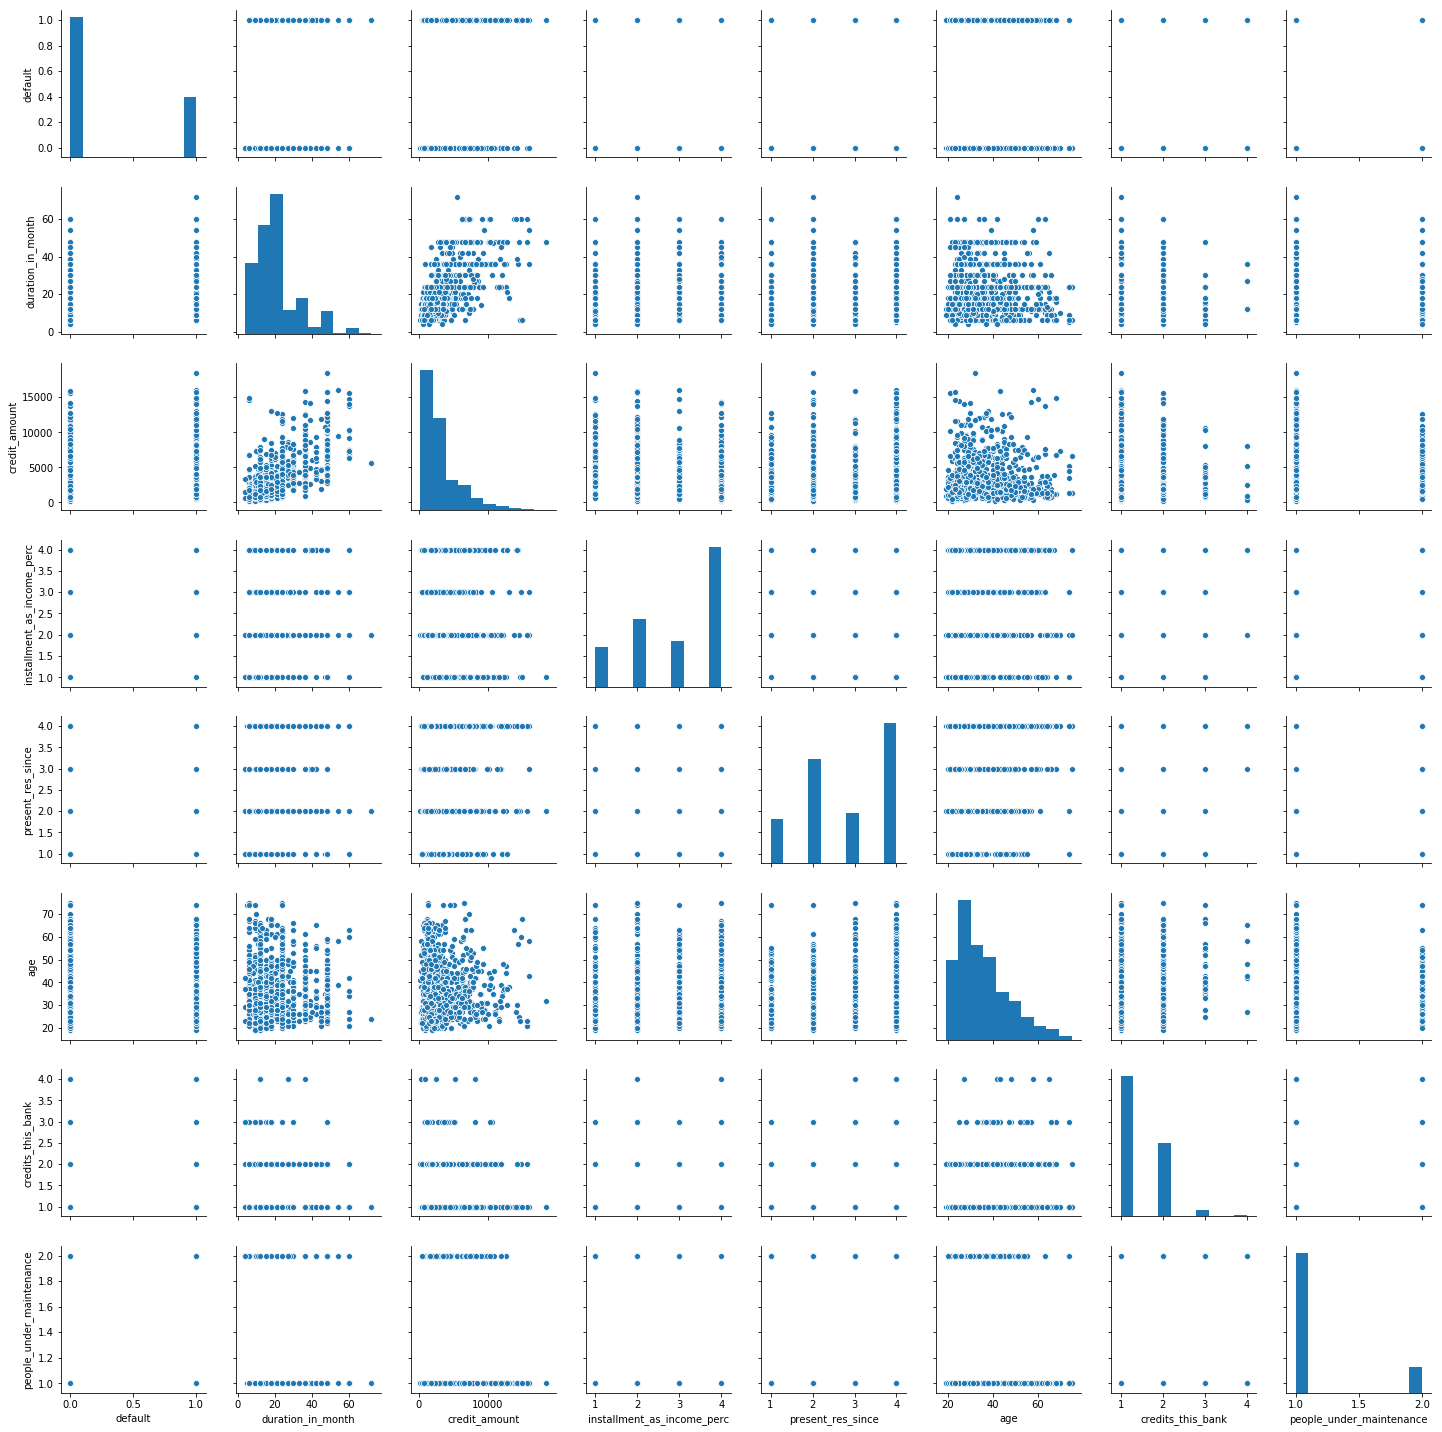

In [87]:
sns.pairplot(df)

### Drop the original variables which are converted to dummy

In [88]:
#Already droped 
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [89]:
test_size=0.70
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import roc_curve, auc

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [91]:
Rf_model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999)
Rf_model.fit(X_train, y_train)
ypred=Rf_model.predict(X_test)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [92]:
Accuracy=metrics.accuracy_score(ypred,y_test)
print("Accuracy for n=", "is ",Accuracy)

Accuracy for n= is  0.7442857142857143


In [93]:
ConfusionMatrix=metrics.confusion_matrix(ypred,y_test)
print(ConfusionMatrix)

[[452 140]
 [ 39  69]]


### Q6 Show the list of the features importance( 1 Marks)

In [94]:
print(Rf_model.feature_importances_)

[0.08068997 0.09601949 0.03770409 0.03774858 0.07587518 0.0172345
 0.01123115 0.0160722  0.0300784  0.00555899 0.03964121 0.01780403
 0.02203647 0.00807217 0.01354198 0.00529808 0.02300937 0.01125204
 0.01281    0.01083244 0.01402888 0.00264127 0.00186728 0.012757
 0.00386718 0.00138462 0.00443718 0.02391671 0.00776463 0.00713703
 0.01604762 0.01352512 0.01592988 0.01444653 0.0127597  0.00527739
 0.01607849 0.01170231 0.00848204 0.01688891 0.00409171 0.00849611
 0.00639587 0.01240499 0.01610382 0.02133575 0.00980167 0.01490826
 0.01637696 0.00561431 0.00575643 0.01365778 0.00928567 0.00970625
 0.0179075  0.0022193  0.0126892  0.01272357 0.01245221 0.00216188
 0.0024607 ]


##### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [96]:
# Use below values
num_folds = 10
seed = 77

In [97]:
#Validate the Random Forest model build above using k fold

In [98]:
results = []
names = []

kfold = model_selection.KFold(n_splits=num_folds,random_state=2)
cv_results = model_selection.cross_val_score(Rf_model, X, y, cv=kfold, 
                                                 scoring='recall')
print(cv_results)
results.append(cv_results)

[0.68       0.28125    0.34782609 0.57142857 0.28571429 0.24390244
 0.36666667 0.4375     0.37931034 0.375     ]


In [99]:
#Calculate Mean score

In [100]:
print(np.mean(cv_results))

0.39685983946180226


In [101]:
# Calculate score standard deviation using std()

In [102]:
print(cv_results.var())

0.016551092469684732


# Q8 Print the confusion matrix( 1 Marks)

In [103]:
ConfusionMatrix=metrics.confusion_matrix(ypred,y_test)
print(ConfusionMatrix)

[[452 140]
 [ 39  69]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [104]:
recall_score(y_test, ypred, average='weighted')

0.7442857142857143

In [105]:
precision_score(y_test, ypred, average='weighted')

0.7263041613041612

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [106]:
#Hint: Use roc_curve

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [108]:
fpr,tpr, _ =roc_curve(y_test,ypred)
print (fpr,tpr,_)

[0.         0.07942974 1.        ] [0.         0.33014354 1.        ] [2 1 0]


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [109]:
roc_auc = metrics.auc(fpr, tpr)

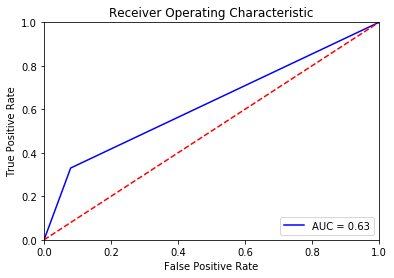

In [110]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [111]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [112]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.utils import rfm

ImportError: cannot import name 'rfm' from 'sklearn.utils' (C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:


for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())